#Gaussians

Formula:

> $p(x) = \dfrac{1}{\sqrt{2\pi\sigma^2}} e^{-(x-\mu)^2/2\sigma^2}$

where,

* $\mu$: mean
* $\sigma^2$: varience

For uncertain, continuous quantities, such as the estimated location of a self-driving car, we use **Gaussians to represent uncertainty** in that quantity. The smaller the variance, the more certain we are about a quantity.

In [ ]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def f(mu, sigma2, x):
    ''' f takes in a mean and squared variance, and an input x
       and returns the gaussian value.'''
    coefficient = 1.0 / sqrt(2.0*pi*sigma2)
    exponential = exp(-((x - mu)**2)/(2.0*sigma2))
    return coefficient*exponential

In [ ]:
g = f(10, 4, 8)
print(g)

0.12098536225957168


## Plotting a Gaussian

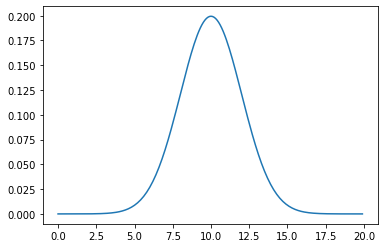

In [ ]:
mu = 10
sigma2 = 4

x_axis = np.arange(0, 20, 0.1)
g = [f(mu, sigma2, x) for x in x_axis]
plt.plot(x_axis, g)

In [ ]:
# maximize a Gaussian by setting mu and x equal
gauss_2 = f(10, 4, 10)
print(gauss_2)

0.19947114020071635


# New mean and variance

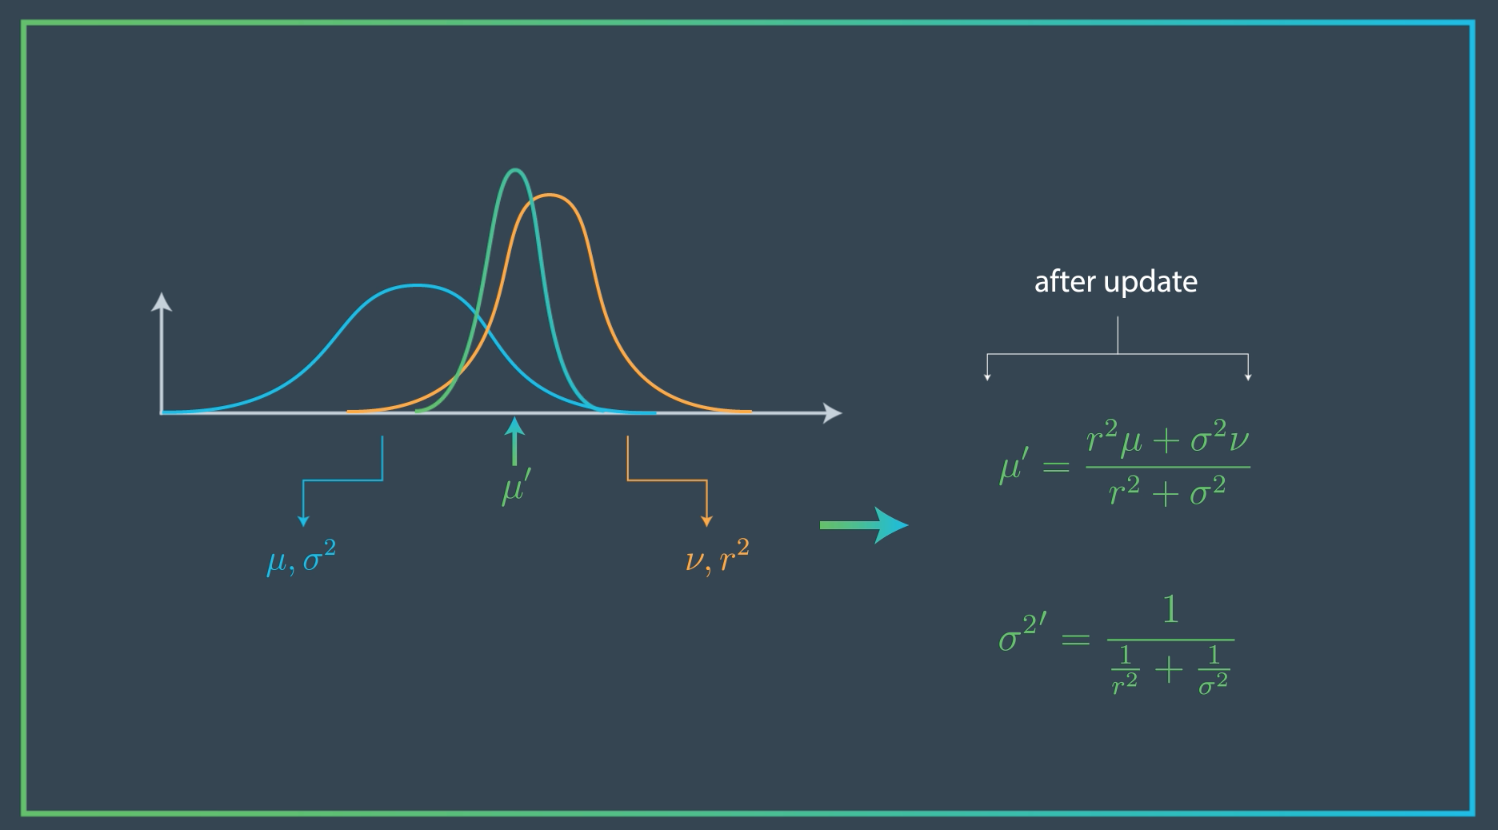

In [ ]:
def update(mean1, var1, mean2, var2):
    new_mean = (mean1*var2 + mean2*var1) / (var2 + var1)
    new_var = 1/(1/var2 + 1/var1)

    return [new_mean, new_var]

In [ ]:
new_params = update(10, 4, 12, 4)
print(new_params)

[11.0, 2.0]


## Plotting a Gaussian

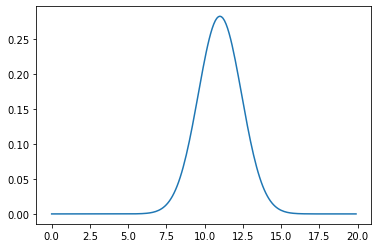

In [ ]:
mu = new_params[0]
sigma2 = new_params[1]

x_axis = np.arange(0, 20, 0.1)
g = [f(mu, sigma2, x) for x in x_axis]
plt.plot(x_axis, g)